In [ ]:
import tweepy
from tweepy import OAuthHandler
 
consumer_key = 'TorDPZLi1cH5Te3hJ0hnivzAv'
consumer_secret = '3XIALYtEjd2gA5g0tEcjwkOH1uZEbcM6gWs6tASEoCrOtmHmS0'
access_token = '708840016940630016-1XUPLjuvOD7GnqxndjE1Cn1lXaPODAP'
access_secret = 'YOUR-ACCESS-SECRET'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

In [ ]:
!pip install twitterscraper


     |████████████████████████████████| 92kB 4.4MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.3.1-cp36-none-any.whl size=10573 sha256=dc5324db673006350863a2555eb6279bc9d8d75e860fffbdcb1001794cce4b5a
  Stored in directory: /root/.cache/pip/wheels/1b/38/dc/ca97310643483cd772d3dee2b18ce210fbca0b8e6ca01595a5
Successfully built twitterscraper


In [ ]:
!pip install tweepy

In [ ]:
!twitterscraper "Luhut Binsar" --output lb.csv --limit 1400 --begindate 2019-10-20 --enddate 2019-10-25 --csv

INFO: {'User-Agent': 'Mozilla/5.0 (compatible, MSIE 11, Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
INFO: queries: ['Luhut Binsar since:2019-10-20 until:2019-10-21', 'Luhut Binsar since:2019-10-21 until:2019-10-22', 'Luhut Binsar since:2019-10-22 until:2019-10-23', 'Luhut Binsar since:2019-10-23 until:2019-10-24', 'Luhut Binsar since:2019-10-24 until:2019-10-25']
INFO: Querying Luhut Binsar since:2019-10-21 until:2019-10-22
INFO: Querying Luhut Binsar since:2019-10-20 until:2019-10-21
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=Luhut%20Binsar%20since%3A2019-10-21%20until%3A2019-10-22&l=None
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=Luhut%20Binsar%20since%3A2019-10-20%20until%3A2019-10-21&l=None
INFO: Using proxy 116.203.127.92:3128
INFO: Using proxy 116.203.127.92:3128
INFO: Querying Luhut Binsar since:2019-10-22 until:2019-10-23
INFO: Querying Luhut Binsar since:2019-10-23 until:2019-10-24
INFO: Scrap

In [ ]:
import pandas as pd #import pandas
import numpy as np #import numpy
from bs4 import BeautifulSoup
import re

df=pd.read_csv('/content/lb.csv',delimiter=";", encoding='utf-8') #Membaca data csv dari 

df.drop(['user_id','tweet_id','tweet_url','timestamp','timestamp_epochs','replies','retweets','likes','is_retweet','retweeter_username','retweeter_userid','retweet_id','html'],axis=1,inplace=True) #menghilangkan kolom yang tidak dibutuhkan

#menghitung banyaknya baris data
elemen = df['username'].count()
df.head(elemen)

,username,fullname,text
0,rafigumbira,Rafi-Gum,"1 lagi Pak, siapapun Menteri yg terpilih nanti..."
1,yudithasaputri_,Yuditha S.,"Terkait susunan baru kabinet, Pak Faisal Basri..."
2,Val_Pradana,Valian A. Pradana,Luhut Binsar Pandjaitan https://twitter.com/nd...
3,PembelaDemiNKRI,Pembela Kebenaran,Apakah anda tidak malu pak @LuhutPandjaitan @L...
4,rasyidfaris12,Faris Rasyid,Ini Menteri Dream Team\n1. Luhut Binsar Pandja...
...,...,...,...
565,arahdotcom,arahdotcom,Luhut Binsar Pandjaitan menjadi tokoh yang ter...
566,FNoverin,Verin,"Moeldoko, Luhut Binsar, Sri Mulyani Hingga Bas..."
567,romal_phd,"Dr.RO Mangardja Lestin,M.Sc,Ph.D",Saya adalah org yg paling mendukung pak @jokow...
568,Megaantariksa28,Mega Antariksa,ini pak luhut binsar panjahitan mudanya pasti ...


In [ ]:
!pip install wordcloud

In [ ]:
#cleansing data
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.text[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

['lagi pak siapapun menteri yg terpilih nanti tolong pos tetap utk jend luhut binsar panjaitan teladan saya dlm berfikir bertindak berbicara kemampuan dlm menyelesaikan masalah sdh tdk diragukan lagi pak luhut selalu bilang pembangunan ini semuanya untuk anak cucu kita',
 'terkait susunan baru kabinet pak faisal basri dalam wawancaranya dengan merekomendasikan nama menteri yg tidak baik diangkat lagi menteri enggar menteri rini amran sulaiman menko luhut binsar wawancara kompas menteri jonan arcandra kabinetkerjapic twitter com ln m m q n',
 'luhut binsar pandjaitan',
 'apakah anda tidak malu pak',
 'ini menteri dream team luhut binsar pandjaitan wiranto am hendropriyono budi gunawan',
 'luhut binsar panjaitan periode kedua jokowi tinggal speed up binsar panjaitan periode kedua jokowi tinggal speed up pic twitter com guzehtvmfb',
 'prediksi calon menteri kabinet luhut binsar panjaitan luhut binsar panjaitan luhut binsar panjaitan luhut binsar panjaitan luhut binsar panjaitan luhut bins

In [ ]:
#menampilkan data yang telah di cleansing
clean_tweet_texts = []
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['text'] = df.text
clean_df.head(700)

,text
0,"1 lagi Pak, siapapun Menteri yg terpilih nanti..."
1,"Terkait susunan baru kabinet, Pak Faisal Basri..."
2,Luhut Binsar Pandjaitan https://twitter.com/nd...
3,Apakah anda tidak malu pak @LuhutPandjaitan @L...
4,Ini Menteri Dream Team\n1. Luhut Binsar Pandja...
...,...
565,Luhut Binsar Pandjaitan menjadi tokoh yang ter...
566,"Moeldoko, Luhut Binsar, Sri Mulyani Hingga Bas..."
567,Saya adalah org yg paling mendukung pak @jokow...
568,ini pak luhut binsar panjahitan mudanya pasti ...


In [ ]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head(700)

,text
0,"1 lagi Pak, siapapun Menteri yg terpilih nanti..."
1,"Terkait susunan baru kabinet, Pak Faisal Basri..."
2,Luhut Binsar Pandjaitan https://twitter.com/nd...
3,Apakah anda tidak malu pak @LuhutPandjaitan @L...
4,Ini Menteri Dream Team\n1. Luhut Binsar Pandja...
...,...
565,Luhut Binsar Pandjaitan menjadi tokoh yang ter...
566,"Moeldoko, Luhut Binsar, Sri Mulyani Hingga Bas..."
567,Saya adalah org yg paling mendukung pak @jokow...
568,ini pak luhut binsar panjahitan mudanya pasti ...


In [ ]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

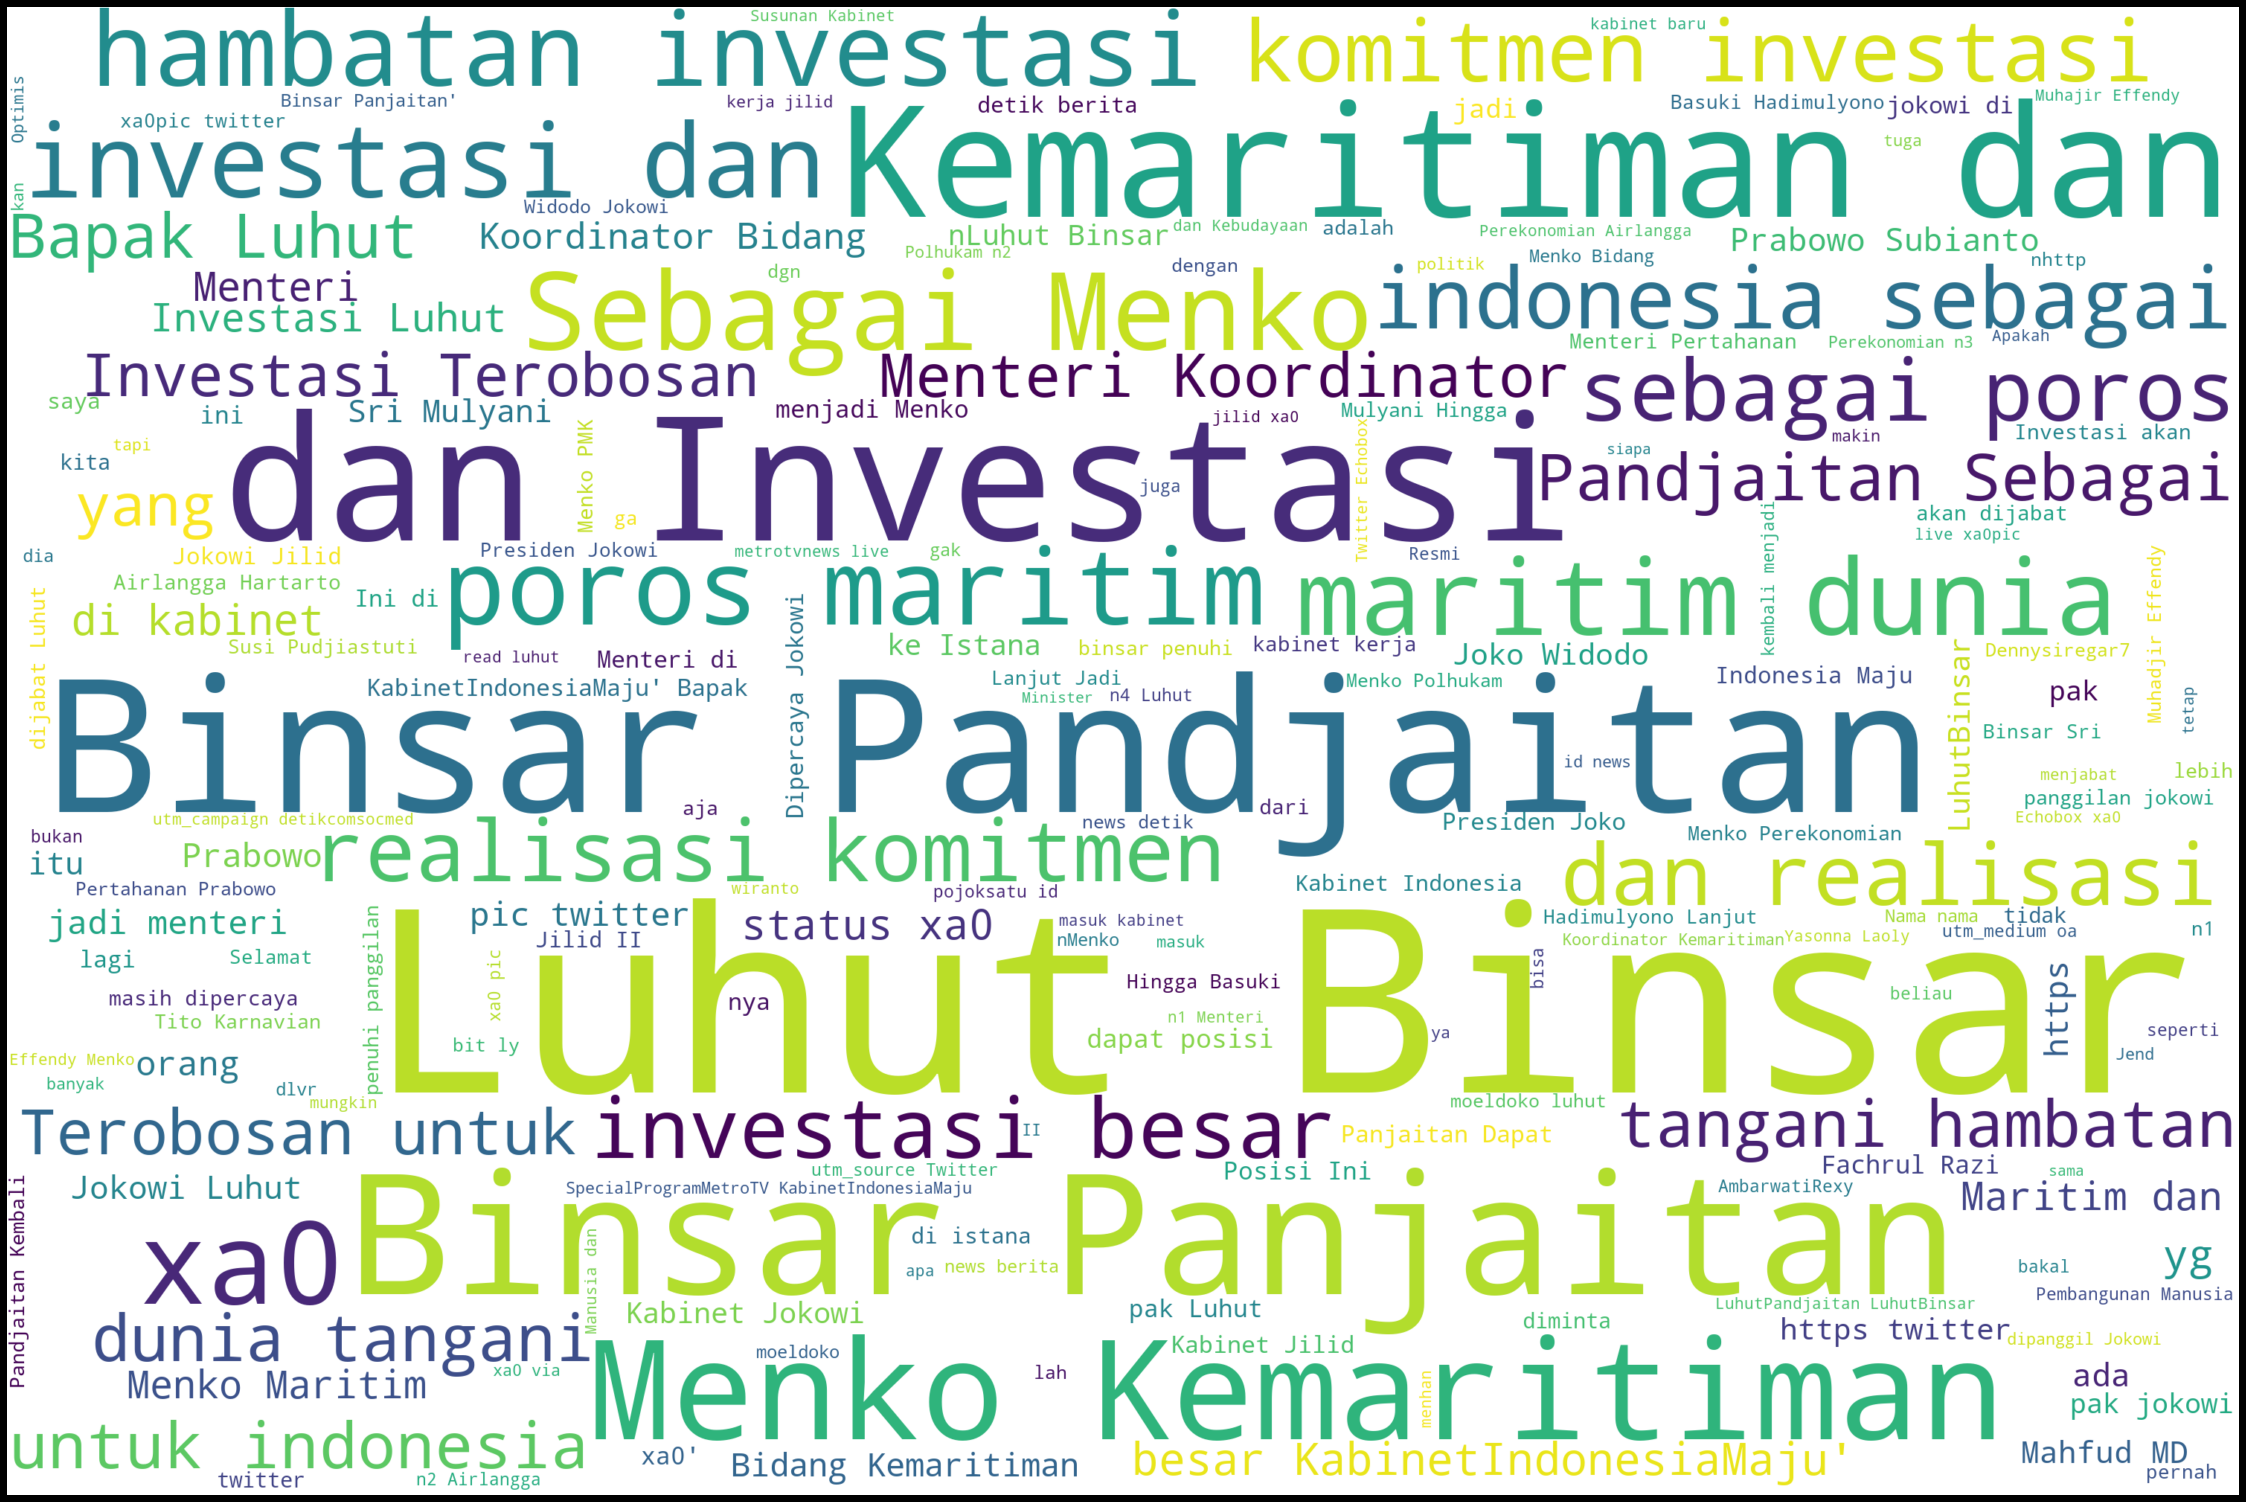

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = df.text.values
wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'White', stopwords = STOPWORDS).generate(str(text))
fig = plt.figure( figsize = (40, 30), facecolor = 'k', edgecolor = 'k')

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
hasil = pd.DataFrame(test_result, columns=['text'])
hasil

,text
0,lagi pak siapapun menteri yg terpilih nanti to...
1,terkait susunan baru kabinet pak faisal basri ...
2,luhut binsar pandjaitan
3,apakah anda tidak malu pak
4,ini menteri dream team luhut binsar pandjaitan...
...,...
95,apakah bakal banyak skpd yg bunuhdiri kita tun...
96,mungkin belajar dari luhut binsar yg muter mut...
97,loe protes aja ama jokowi megawati luhut binsa...
98,tahukah kamu dulu prabowo subianto dan luhut b...


In [ ]:
hasil.to_csv(r'output.csv',sep=';',index=False)

In [ ]:
!pip install TextBlob
from textblob import TextBlob
for text in test_result:
  print(text)
  analysis = TextBlob(text)
  print(analysis.sentiment)

lagi pak siapapun menteri yg terpilih nanti tolong pos tetap utk jend luhut binsar panjaitan teladan saya dlm berfikir bertindak berbicara kemampuan dlm menyelesaikan masalah sdh tdk diragukan lagi pak luhut selalu bilang pembangunan ini semuanya untuk anak cucu kita
Sentiment(polarity=0.0, subjectivity=0.0)
terkait susunan baru kabinet pak faisal basri dalam wawancaranya dengan merekomendasikan nama menteri yg tidak baik diangkat lagi menteri enggar menteri rini amran sulaiman menko luhut binsar wawancara kompas menteri jonan arcandra kabinetkerjapic twitter com ln m m q n
Sentiment(polarity=0.0, subjectivity=0.0)
luhut binsar pandjaitan
Sentiment(polarity=0.0, subjectivity=0.0)
apakah anda tidak malu pak
Sentiment(polarity=0.0, subjectivity=0.0)
ini menteri dream team luhut binsar pandjaitan wiranto am hendropriyono budi gunawan
Sentiment(polarity=0.0, subjectivity=0.0)
luhut binsar panjaitan periode kedua jokowi tinggal speed up binsar panjaitan periode kedua jokowi tinggal speed up

In [ ]:
!pip install vaderSentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer

     |████████████████████████████████| 133kB 2.8MB/s 


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# Import library for Text Analytics
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Sentiment Analysis
sid = sid = SentimentIntensityAnalyzer()
listy = [] 
for index, row in hasil.iterrows():
  ss = sid.polarity_scores(row["text"])
  listy.append(ss)
  
se = pd.Series(listy)
hasil['polarity'] = se.values
display(hasil.head(100))

,text,polarity
0,lagi pak siapapun menteri yg terpilih nanti to...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,terkait susunan baru kabinet pak faisal basri ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,luhut binsar pandjaitan,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,apakah anda tidak malu pak,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,ini menteri dream team luhut binsar pandjaitan...,"{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'comp..."
...,...,...
95,apakah bakal banyak skpd yg bunuhdiri kita tun...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
96,mungkin belajar dari luhut binsar yg muter mut...,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp..."
97,loe protes aja ama jokowi megawati luhut binsa...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
98,tahukah kamu dulu prabowo subianto dan luhut b...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
import matplotlib.pyplot as plt

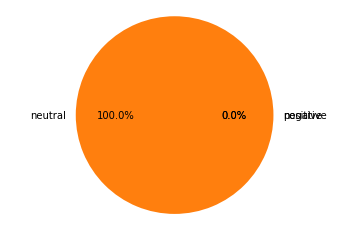

In [ ]:
# Pie Chart Visualization
labels = ['negative', 'neutral', 'positive']
sizes  = [ss['neg'], ss['neu'], ss['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal') 
plt.show()

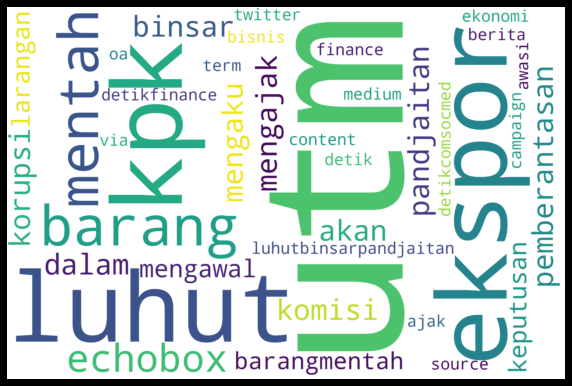

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
 
# Create a list of word
luhutbinsar=pd.read_csv("output.csv")

wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'White').generate(str(text))
fig = plt.figure( figsize = (10, 30), facecolor = 'k', edgecolor = 'k')

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()